In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
plt.style.use('seaborn')

## A Little Statistics

### 1. Converting a Probability to a Sigma

#### 1A.
In physics, a *'sigma'* refers to the probability of an event. Values of Xσ correspond to the probability obtained by integrating a probability density function (pdf); an event at 1σ, for example, has a probability of
$
\int_{-\infty}^{1} pdf(x)dx
$
, the area under the entire function left of 1σ. The left plot of the figure below shows a Standard Normal / Gaussian Distribution. The right plot shows the same data on a semilog scale.

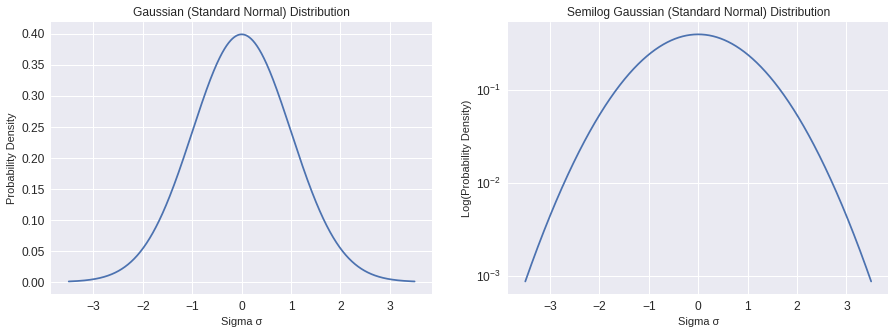

In [3]:
x = np.linspace(-3.5, 3.5, 1000)
y = stats.norm.pdf(x, loc = 0., scale = 1.)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(x, y)
ax[0].tick_params(labelsize = 12)
ax[0].set_xlabel("Sigma σ")
ax[0].set_ylabel("Probability Density")
ax[0].set_title("Gaussian (Standard Normal) Distribution")

ax[1].semilogy(x, y)
ax[1].tick_params(labelsize = 12)
ax[1].set_xlabel("Sigma σ")
ax[1].set_ylabel("Log(Probability Density)")
ax[1].set_title("Semilog Gaussian (Standard Normal) Distribution")

plt.show()

There are built-in Python commands for various distributions that can be used to calculate the probability at a given sigma and the sigma from a given probability. To make sure these commands have been used correctly, their results can be compared to accepted values from a z-table. 

In [4]:
# A handful of sigma and probability values pulled from the Gaussian distribution z-table.

sigma = np.array([-4, -3.6, -2.3, -0.5, 1.3, 3.5])
probability = np.array([0.00003, 0.00016, 0.01072, 0.30854, 0.90320, 0.99977])

#### 1B. 
The Cumulative Distribution Function *(stats.norm.cdf)* integrates the probability distribution, calculating the probability based on a given σ (z-score). This integration is performed from the left, so answers the question "what's the chance of getting less than or equal to my chosen value".

In [5]:
# Find probability based on z-score using norm.cdf.

# Probabilities calculated at the sigma values defined above
prob_calc = np.array(stats.norm.cdf(sigma, loc=0, scale=1))

# Check error by subtracting z-table value from calculated value
error = np.round(prob_calc - probability, 4)

print("Sigma, Probability:" + "\n",
      "(" + str(sigma[0]) + " , " + str(prob_calc[0]) + ")\n",
      "(" + str(sigma[1]) + " , " + str(prob_calc[1]) + ")\n",
      "(" + str(sigma[2]) + " , " + str(prob_calc[2]) + ")\n",
      "(" + str(sigma[3]) + " , " + str(prob_calc[3]) + ")\n",
      "(" + str(sigma[4]) + " , " + str(prob_calc[4]) + ")\n",
      "(" + str(sigma[5]) + " , " + str(prob_calc[5]) + ")\n"
     )

print("Error: (Calculated probability value) - (Z-Table probability value):\n", 
      str(error))

Sigma, Probability:
 (-4.0 , 3.167124183311986e-05)
 (-3.6 , 0.00015910859015753364)
 (-2.3 , 0.010724110021675809)
 (-0.5 , 0.3085375387259869)
 (1.3 , 0.9031995154143897)
 (3.5 , 0.9997673709209645)

Error: (Calculated probability value) - (Z-Table probability value):
 [ 0. -0.  0. -0. -0. -0.]


#### 1C.
The Percent Point Function *(stats.norm.ppf)* calculates the σ (z-score) based on a given probability. 

In [6]:
# Find z-score based on probability using norm.ppf

# Sigmas calculated at the probability values defined above
sig_calc = np.array(stats.norm.ppf(probability, loc=0, scale=1))

# Check error by subtracting z-table value from calculated value
error = np.round((sig_calc - sigma), 4)

print("Probability, Sigma:" + "\n",
      "(" + str(probability[0]) + " , " + str(sig_calc[0]) + ")\n",
      "(" + str(probability[1]) + " , " + str(sig_calc[1]) + ")\n",
      "(" + str(probability[2]) + " , " + str(sig_calc[2]) + ")\n",
      "(" + str(probability[3]) + " , " + str(sig_calc[3]) + ")\n",
      "(" + str(probability[4]) + " , " + str(sig_calc[4]) + ")\n",
      "(" + str(probability[5]) + " , " + str(sig_calc[5]) + ")\n"
     )

print("Error: (Calculated sigma value) - (Z-Table sigma value):\n",
      str(error))

Probability, Sigma:
 (3e-05 , -4.012810811118254)
 (0.00016 , -3.5985470207163295)
 (0.01072 , -2.300145116042859)
 (0.30854 , -0.49999300905393307)
 (0.9032 , 1.3000028277439595)
 (0.99977 , 3.5030286404612005)

Error: (Calculated sigma value) - (Z-Table sigma value):
 [-0.0128  0.0015 -0.0001  0.      0.      0.003 ]


If a sigma value is negative in a standard normal distribution, it corresponds to a probability value left of the mean. The error is likely introduced due to rounding.

### 2. Non-Gaussian: The Chi-Squared Distribution

The chi-squared (χ2) distribution is made up of the sum of the squares of *k* independent standard-normal random variables. 

In [7]:
# Degrees of freedom, mean
k = 10
# χ2 distribution of random variables
d = stats.chi2.rvs(k, size=1000)
x = np.linspace(0, 65, 1000)

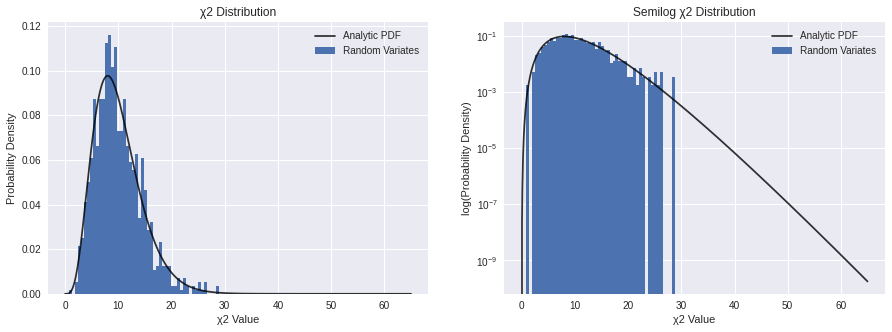

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].hist(d, 50, density=True, histtype='stepfilled', label="Random Variates")
rv = stats.chi2(k)
ax[0].plot(x, rv.pdf(x), 'k-', alpha=0.8, label="Analytic PDF")
ax[0].set_xlabel("χ2 Value")
ax[0].set_ylabel("Probability Density")
ax[0].set_title("χ2 Distribution")
ax[0].legend(loc=0)

ax[1].hist(d, 50, density=True, histtype='stepfilled', label="Random Variates")
rv = stats.chi2(k)
ax[1].semilogy(x, rv.pdf(x), 'k-', alpha=0.8, label="Analytic PDF")
ax[1].set_xlabel("χ2 Value")
ax[1].set_ylabel("log(Probability Density)")
ax[1].set_title("Semilog χ2 Distribution")
ax[1].legend(loc=0)

plt.show()

### 3. Determining Xσ of a Measurement

#### 3A.
First we pick a hypothetical measurement value. 20 makes sense with my data below.

In [9]:
measurement_value = 20

#### 3B.
#### Statistical Question
My hypothetical data set has a chi-squared distribution, and a successful signal measurement is a spike (i.e I'm looking for large values). What is the chance that the background produces a value as or more signal-like than what I observed?

#### 3C.
To find this probability, integrate the probability density function from the measurement value to infinity. For the case of chi-squared, the integral looks like:

$
\large{\int_{a}^{\infty} pdf(x)dx} = \Large{\int_{\large{a}}^{\large{\infty}}}\large \frac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}} {2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)} \small{dx}
$

$(x>0)$

This can be seen graphically below.

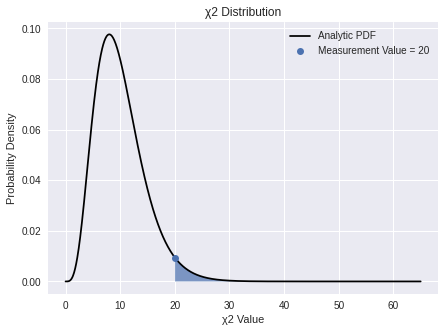

In [10]:
fig, ax = plt.subplots(figsize=(7,5))

rv = stats.chi2(k)
y = rv.pdf(x)
ax.plot(x, y, 'k-', label="Analytic PDF")
ax.plot(measurement_value, rv.pdf(measurement_value), 'o', label="Measurement Value = " +str(measurement_value))
ax.set_xlabel("χ2 Value")
ax.set_ylabel("Probability Density")
ax.set_title("χ2 Distribution")
ax.legend(loc=0)

plt.fill_between(x, y, where=x>=measurement_value, alpha=0.7)

plt.show()

#### 3D.
Like *stats.norm.cdf*, the function *stats.chi2.cdf* will find the probability of my given measurement value. However, this function integrates under the curve to the left of the measurement value by default. It's possible to find the right side by subtracting this probability from 1 (the value of the entire integral), but the built-in Survival Function *(stats.chi2.sf)* automatically calculates this quantity and is more accurate.

In [11]:
# Find the probability of detecting greater than or equal to my measurement value.

prob = scipy.stats.chi2.sf(measurement_value, k)

print("There is a 1-in-"+str(round(1/prob))+
      " chance the background alone produces a value as or more signal-like than my measurement value.")

There is a 1-in-34 chance the background alone produces a value as or more signal-like than my measurement value.


#### 3E.
Finally, we can use this probability to express the event in terms of Xσ. This reported value of Xσ is relative to a Standard Normal / Gaussian distribution, so we again use *stats.norm.ppf* to reverse-integrate based on probability.

In [12]:
# Find the standard normal Xσ based on the above probability.

sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("A successful detection at a measurement value of " +str(measurement_value)+ 
      " can be reported with a certainty of " +str(abs(round(sigma,1)))+ "σ.")

A successful detection at a measurement value of 20 can be reported with a certainty of 1.9σ.


5σ certainty is the standard in particle physics, so a measurement value of 20 is not statistically significant. How do higher values fare?
### 4. 

In [13]:
# Pick more measurement values
measurement_value_array = np.array([30, 35, 40, 45, 50, 55, 60])

# Calculate their probabilities
prob = scipy.stats.chi2.sf(measurement_value_array, k)

# Reverse-integrate the normal distribution to find Xσ
sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("Value, Sigma\n"
      "(" + str(measurement_value_array[0]) + " , " + str(abs(round(sigma[0],1))) + "σ)\n"
      "(" + str(measurement_value_array[1]) + " , " + str(abs(round(sigma[1],1))) + "σ)\n"
      "(" + str(measurement_value_array[2]) + " , " + str(abs(round(sigma[2],1))) + "σ)\n"
      "(" + str(measurement_value_array[3]) + " , " + str(abs(round(sigma[3],1))) + "σ)\n"
      "(" + str(measurement_value_array[4]) + " , " + str(abs(round(sigma[4],1))) + "σ)\n"
      "(" + str(measurement_value_array[5]) + " , " + str(abs(round(sigma[5],1))) + "σ)\n"
      "(" + str(measurement_value_array[6]) + " , " + str(abs(round(sigma[6],1))) + "σ)"
     )

Value, Sigma
(30 , 3.1σ)
(35 , 3.7σ)
(40 , 4.1σ)
(45 , 4.6σ)
(50 , 5.0σ)
(55 , 5.4σ)
(60 , 5.8σ)


Higher values correspond to higher statistical significance, as expected. The given χ2 distribution requires a measurement value of 50 before we can report success with any confidence.

## Non-continuous Distributions

#### Poisson Distribution

The Poisson Distribution is a discreet distribution that expresses the probability of an event happening in a certain interval of time or space. It has parameters *μ* (expected mean rate of occurances) and *k* (number of occurances). 

The probability mass function is given by:

$
\large{\!f(k, \mu)=  \frac{\mu^k e^{-\mu}}{k!}}
$

#### 1B.

In [16]:
# Define parameters
mu = np.array([1, 4, 8, 10])
k = np.arange(0, 20, 1)

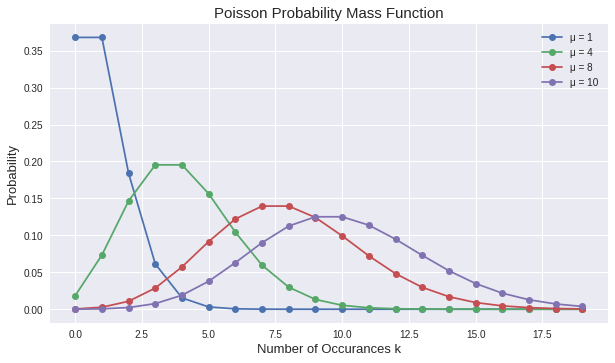

In [18]:
fig, ax = plt.subplots(figsize=(10,5.5))

for i in range(len(mu)):
    y = stats.poisson.pmf(k, mu[i], loc=0)
    ax.plot(k,y, 'o-', label='μ = '+str(mu[i]))

ax.set_xlabel("Number of Occurances k", fontsize=13)
ax.set_ylabel("Probability", fontsize=13)
ax.set_title("Poisson Probability Mass Function", fontsize=15)
ax.legend(loc=0)
plt.show()

The height and spread of the Poisson Distribution depends on the expected mean rate of occurances, $\mu$. For $\mu = 1$, both $k=0$ and $k=1$ are equally probable and the distribution quickly falls off at higher values of $k$. $\mu = 10$ has a much shallower, almost Gaussian-shaped distribution; several values around the mean have similar probabilites. As the predicted rate of occurance increases, the variance also increases.

In [19]:
measurement_value = 1

mu = 8

This time I'm integrating the function to the left of my value, so using *stats.poisson.cdf* will give me the correct probability.

In [21]:
# find poisson probability

prob = stats.poisson.cdf(measurement_value, mu)

print("There is a 1-in-"+str(round(1/prob))+
      " chance the background alone produces a value as or more signal-like than my measurement value.")

There is a 1-in-331 chance the background alone produces a value as or more signal-like than my measurement value.


Like before, I can use *stats.norm.ppf* to reverse-integrate a Gaussian distribution based on my calculated probability.

In [22]:
# find Xσ

sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("A successful detection at a measurement value of " +str(measurement_value)+ 
      " can be reported with a certainty of " +str(abs(round(sigma,1)))+ "σ.")

A successful detection at a measurement value of 1 can be reported with a certainty of 2.7σ.


Since the probabilities and sigma values are discreet, a Xσ value of 2.7 doesn't make much sense. This must either be rounded down to 2 or up to 3, neither of which provide the most accurate value. The distribution *can* have a non-integer mean, however, as the mean is a single calculation and can lie between discreet data points. The time (or space) interval of the Poisson distribution changes continuously, but the number of events is discreet. 